In [21]:
import warnings
warnings.simplefilter('ignore')

# DESAFIOS - AULA 04

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

- Também não tem nota quem foi eliminado na prova -> TP_PRESENCA == 2

In [5]:
import pandas as pd
# arrendondar casas decimais:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

#uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
uri = "dados/MICRODADOS_ENEM_2018_SAMPLE_43278.txt"
dados = pd.read_csv(uri)

In [6]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas]
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,nan,nan,nan,nan,nan
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,nan,nan,nan,nan,nan


In [7]:
colunas = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

In [8]:
dados_notas.describe()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
count,"97,537.00","103,774.00","103,774.00","97,537.00","103,774.00"
mean,493.63,568.31,526.59,535.18,509.13
std,74.18,81.03,73.02,102.83,187.01
min,0.00,0.00,0.00,0.00,0.00
25%,435.50,510.40,475.70,455.60,360.00
50%,483.50,582.40,531.20,516.50,520.00
75%,542.60,628.00,579.80,600.00,620.00
max,869.60,850.40,781.40,989.90,"1,000.00"


### Resposta 1.1 - Média

In [9]:
dados_notas_1 = dados_notas.copy()

for coluna in colunas:
    nota_media = dados_notas_1[coluna].mean()
    dados_notas_1.update(dados_notas_1[coluna].fillna(nota_media))


In [10]:
dados_notas_1.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,493.63,568.31,526.59,535.18,509.13
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,493.63,568.31,526.59,535.18,509.13


### Resposta 1.2 - Mediana

In [11]:
dados_notas_2 = dados_notas.copy()

for coluna in colunas:
    nota_mediana = dados_notas_2[coluna].median()
    dados_notas_2.update(dados_notas_2[coluna].fillna(nota_mediana))

In [12]:
dados_notas_2.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,483.50,582.40,531.20,516.50,520.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,483.50,582.40,531.20,516.50,520.00


### Resposta 1.3 - Zero

In [13]:
dados_notas_3 = dados_notas.copy()

for coluna in colunas:
    dados_notas_3.update(dados_notas_3[coluna].fillna(0.0))

In [14]:
dados_notas_3.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [15]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


In [16]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

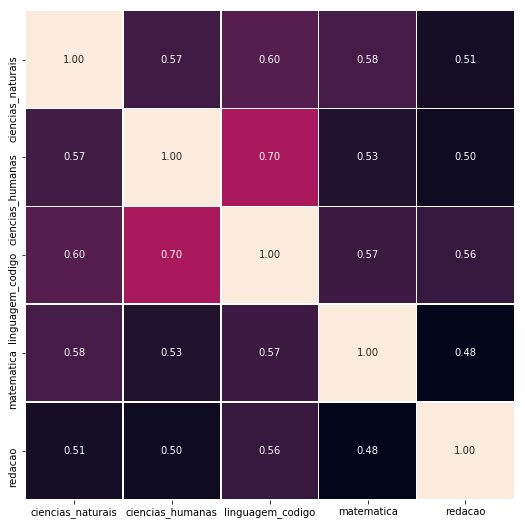

In [17]:
f, ax = plt.subplots(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cbar=False, square=True ,linewidths=.5)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [18]:
dados_filtrados = dados[['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','NU_NOTA_REDACAO']]

### Separando em DataFrames menores (para reduzir o tempo de processamento)

In [19]:
dados_filtrados_CN = dados_filtrados[['TX_RESPOSTAS_CN','TX_GABARITO_CN']]
dados_filtrados_CH = dados_filtrados[['TX_RESPOSTAS_CH','TX_GABARITO_CH']]
dados_filtrados_LC = dados_filtrados[['TX_RESPOSTAS_LC','TX_GABARITO_LC']]
dados_filtrados_MT = dados_filtrados[['TX_RESPOSTAS_MT','TX_GABARITO_MT']]
dados_filtrados_redacao = dados_filtrados[['NU_NOTA_REDACAO']]

### Retirando dados nulos

In [22]:
dados_filtrados_CN.dropna(inplace=True)
dados_filtrados_CH.dropna(inplace=True)
dados_filtrados_MT.dropna(inplace=True)
dados_filtrados_LC.dropna(inplace=True)
dados_filtrados_redacao.dropna(inplace=True)

### Calculando os acertos

In [23]:
def calc_acertos(resposta,gabarito):
    return [sum(c==d for c, d in zip(a,b)) for a, b in zip(resposta, gabarito)]


dados_filtrados_CN["ACERTOS_CN"] = calc_acertos(dados_filtrados_CN["TX_RESPOSTAS_CN"], 
                                                dados_filtrados_CN["TX_GABARITO_CN"])


dados_filtrados_CH["ACERTOS_CH"] = calc_acertos(dados_filtrados_CH["TX_RESPOSTAS_CH"], 
                                                dados_filtrados_CH["TX_GABARITO_CH"])

dados_filtrados_LC["ACERTOS_LC"] = calc_acertos(dados_filtrados_LC["TX_RESPOSTAS_LC"], 
                                                dados_filtrados_LC["TX_GABARITO_LC"])

dados_filtrados_MT["ACERTOS_MT"] = calc_acertos(dados_filtrados_MT["TX_RESPOSTAS_MT"], 
                                                dados_filtrados_MT["TX_GABARITO_MT"])

### Fazendo um join nos DataFrames

In [24]:
df100 = dados_filtrados_CN.join(dados_filtrados_CH).join(dados_filtrados_MT).join(dados_filtrados_LC).join(dados_filtrados_redacao)

### Criando o gráfico

,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,NU_NOTA_REDACAO
ACERTOS_CN,1.00,0.62,0.57,0.57,0.48
ACERTOS_CH,0.62,1.00,0.74,0.57,0.54
ACERTOS_LC,0.57,0.74,1.00,0.54,0.56
ACERTOS_MT,0.57,0.57,0.54,1.00,0.44
NU_NOTA_REDACAO,0.48,0.54,0.56,0.44,1.00


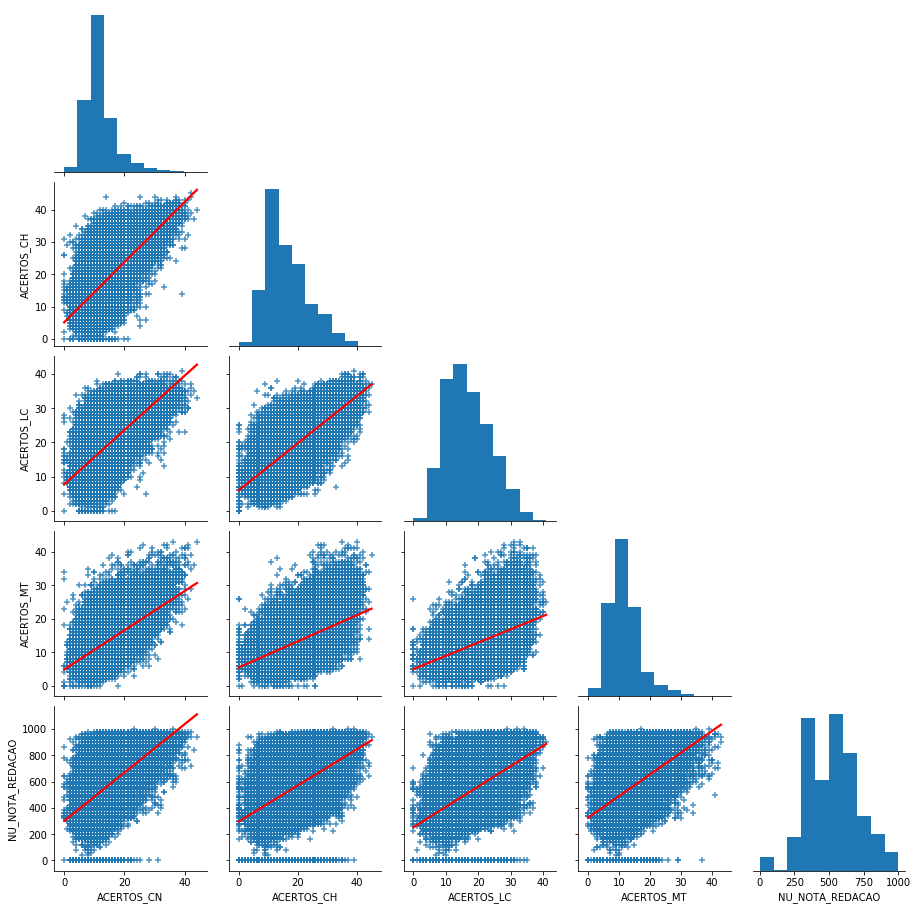

In [422]:
sns.pairplot(df100[["ACERTOS_CN", "ACERTOS_CH", "ACERTOS_LC", "ACERTOS_MT", "NU_NOTA_REDACAO"]], 
                    kind='reg', 
                    plot_kws={'line_kws':{'color':'red'}},
                     markers="+",
                     corner=True)

df100[["ACERTOS_CN", "ACERTOS_CH", "ACERTOS_LC", "ACERTOS_MT", "NU_NOTA_REDACAO"]].corr()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [21]:
CN_SEM_ZEROS = dados_filtrados_CN[dados_filtrados_CN['ACERTOS_CN'] != 0]
CH_SEM_ZEROS = dados_filtrados_CH[dados_filtrados_CH['ACERTOS_CH'] != 0]
LC_SEM_ZEROS = dados_filtrados_LC[dados_filtrados_LC['ACERTOS_LC'] != 0]
MT_SEM_ZEROS = dados_filtrados_MT[dados_filtrados_MT['ACERTOS_MT'] != 0]
REDACAO_SEM_ZEROS = dados_filtrados_redacao[dados_filtrados_redacao['NU_NOTA_REDACAO'] != 0]

In [22]:
df200 = CN_SEM_ZEROS.join(CH_SEM_ZEROS).join(MT_SEM_ZEROS).join(LC_SEM_ZEROS).join(REDACAO_SEM_ZEROS)

,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,NU_NOTA_REDACAO
ACERTOS_CN,1.00,0.62,0.57,0.57,0.50
ACERTOS_CH,0.62,1.00,0.74,0.57,0.56
ACERTOS_LC,0.57,0.74,1.00,0.54,0.57
ACERTOS_MT,0.57,0.57,0.54,1.00,0.46
NU_NOTA_REDACAO,0.50,0.56,0.57,0.46,1.00


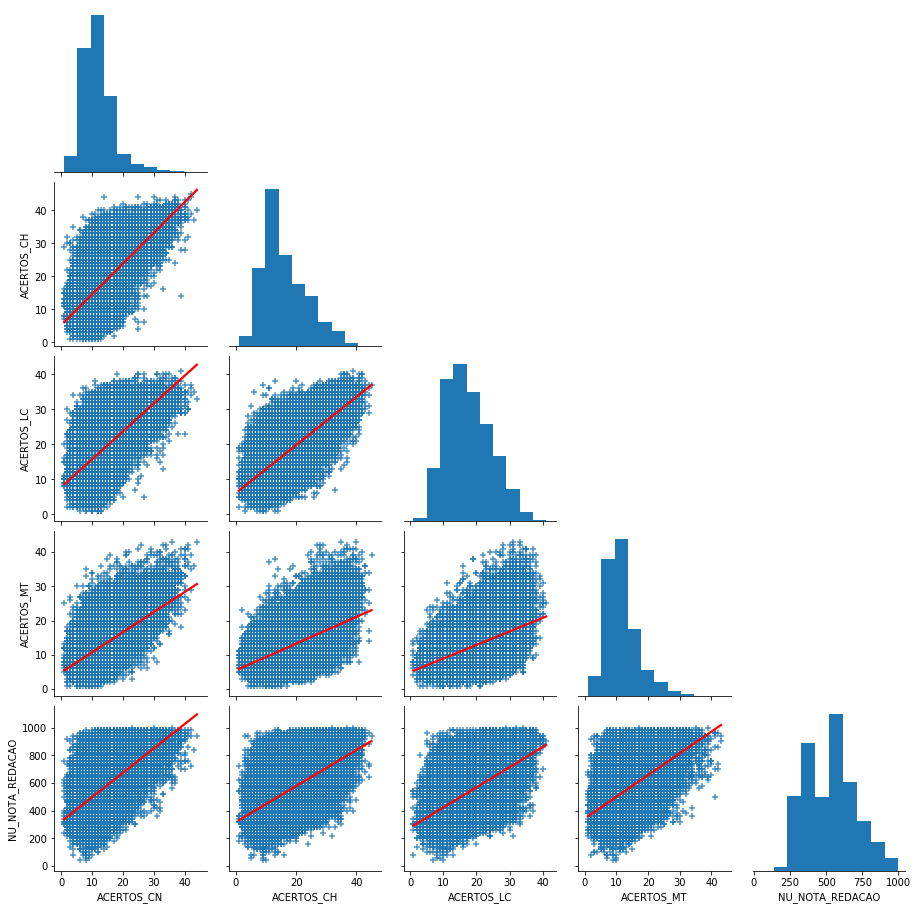

In [434]:
sns.pairplot(df200[["ACERTOS_CN", "ACERTOS_CH", "ACERTOS_LC", "ACERTOS_MT", "NU_NOTA_REDACAO"]], 
                    kind='reg', 
                    plot_kws={'line_kws':{'color':'red'}},
                     markers="+",
                     corner=True)

df200[["ACERTOS_CN", "ACERTOS_CH", "ACERTOS_LC", "ACERTOS_MT", "NU_NOTA_REDACAO"]].corr()

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

#### Trocando enunciado para: Quais provas tiveram mais questões com erros (análise sobre o gabarito x acetos x erros)

In [25]:
df300 = df100[['TX_RESPOSTAS_CN','TX_GABARITO_CN','ACERTOS_CN',
              'TX_RESPOSTAS_CH','TX_GABARITO_CH','ACERTOS_CH', 
              'TX_RESPOSTAS_LC','TX_GABARITO_LC','ACERTOS_LC',
              'TX_RESPOSTAS_MT','TX_GABARITO_MT','ACERTOS_MT',
              ]]

In [26]:
df300_CN = df300[['TX_RESPOSTAS_CN','TX_GABARITO_CN','ACERTOS_CN']]
df300_CH = df300[['TX_RESPOSTAS_CH','TX_GABARITO_CH','ACERTOS_CH']]
df300_LC = df300[['TX_RESPOSTAS_LC','TX_GABARITO_LC','ACERTOS_LC']]
df300_MT = df300[['TX_RESPOSTAS_MT','TX_GABARITO_MT','ACERTOS_MT']]

In [27]:
df300_CN.dropna(inplace=True)
df300_CH.dropna(inplace=True)
df300_LC.dropna(inplace=True)
df300_MT.dropna(inplace=True)

In [28]:

def calc_erros(resposta,gabarito):
    return [45 - sum(c==d for c, d in zip(a,b)) for a, b in zip(resposta, gabarito)]


df300_CN["ERROS_CN"] = calc_erros(df300_CN["TX_RESPOSTAS_CN"], 
                               df300_CN["TX_GABARITO_CN"])

df300_CH["ERROS_CH"] = calc_erros(df300_CH["TX_RESPOSTAS_CH"], 
                               df300_CH["TX_GABARITO_CH"])

df300_LC["ERROS_LC"] = calc_erros(df300_LC["TX_RESPOSTAS_LC"], 
                               df300_LC["TX_GABARITO_LC"])

df300_MT["ERROS_MT"] = calc_erros(df300_MT["TX_RESPOSTAS_MT"], 
                               df300_MT["TX_GABARITO_MT"])

In [29]:
df400 = df300_CN.join(df300_CH).join(df300_LC).join(df300_MT)

In [30]:
df400.describe()

,ACERTOS_CN,ERROS_CN,ACERTOS_CH,ERROS_CH,ACERTOS_LC,ERROS_LC,ACERTOS_MT,ERROS_MT
count,"97,537.00","97,537.00","97,270.00","97,270.00","97,270.00","97,270.00","97,537.00","97,537.00"
mean,11.73,33.27,16.06,28.94,17.07,27.93,11.70,33.30
std,4.80,4.80,7.26,7.26,6.72,6.72,4.95,4.95
min,0.00,1.00,0.00,0.00,0.00,4.00,0.00,2.00
25%,9.00,31.00,11.00,25.00,12.00,23.00,8.00,31.00
50%,11.00,34.00,15.00,30.00,16.00,29.00,11.00,34.00
75%,14.00,36.00,20.00,34.00,22.00,33.00,14.00,37.00
max,44.00,45.00,45.00,45.00,41.00,45.00,43.00,45.00


In [48]:
df400[['ERROS_CN','ERROS_CH','ERROS_LC','ERROS_MT']].sum()

ERROS_CN   3,244,952.00
ERROS_CH   2,814,973.00
ERROS_LC   2,716,613.00
ERROS_MT   3,248,124.00
dtype: float64

#### Consierando o somatório , a média e mediana dos erros, chegamos a conclusão que as provas de matemática tiveram a maior quantidade de erros.

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

Ética no tratamento de dados deve ir além da privacidade: a ética deve ser considerada e incluída em todas as sete etapas do ciclo de vida dos dados. Heather Krause, em seu artigo Are Ethics in Data Science really that important?, para o Case Experts, refere-se ao fato de que as publicações e os especialistas em dados tendem a se concentrar mais na privacidade porque, muitas vezes, é bem mais fácil abordar questões de privacidade do que lidar com aspectos da incorporação da ética na cadeia de uso das informações no negócio.

O debate sobre o assunto está só começando, as considerações são extensas e, até o momento, estão abertas a diversas interpretações. Mas se tratando da Lei Geral de Proteção de Dados Pessoais, o que devemos e podemos já fazer? Em primeiro lugar, voltar aos pontos mais básicos da lei, que remetem diretamente a respeitar o direito de privacidade.


O campo da ética aplicada a IA ainda está em desenvolvimento. Muitos avanços foram feitos para evitar o erro do viés e fornecer uma capacidade de explicação razoável para os algoritmos de Aprendizado de Máquina, analisando e isolando as chamadas variáveis latentes. Porém, é importante que a velocidade do desenvolvimento de algoritmos ajustados a princípios éticos esteja alinhada à própria velocidade de avanço da IA e sua regulamentação de uso. Esse é um grande desafio, pois normalmente os avanços tecnológicos acontecem mais rápido do que a resposta das sociedades em forma de legislação. Por isso, de momento cabe aos desenvolvedores de sistemas de IA que estejam atentos à aplicação de princípios éticos no desenvolvimento de suas aplicações.

Fonte: https://www.serpro.gov.br/lgpd/noticias/2019/tratamento-etico-dados-pessoais-ciencia-data-science

Fonte: https://tiinside.com.br/23/04/2020/etica-em-inteligencia-artificial-e-a-covid-19/

#### Evandro Avellar

23/04/2020